Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


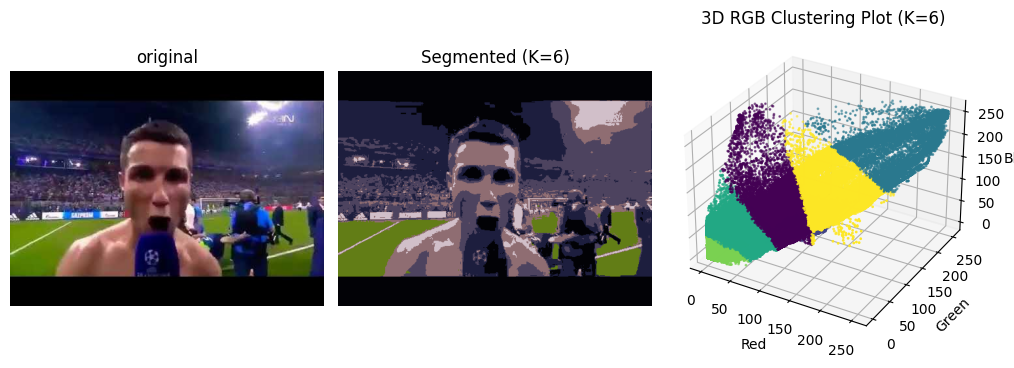

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/drive')
# Load the image
image = cv2.imread("/content/drive/MyDrive/images/suii.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (each pixel is a vector of 3 values: R, G, B)
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

# Define criteria and apply KMeans
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 (color values)
centers = np.uint8(centers)

# Map labels to the corresponding centers (cluster centers)
segmented_image = centers[labels.flatten()]

# Reshape back to the original image size
segmented_image = segmented_image.reshape(image.shape)

# Set up the figure for multiple subplots
fig = plt.figure(figsize=(10, 6))

# Plot original image
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image)
ax1.set_title('original')
ax1.axis('off')

# Plot segmented image
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(segmented_image)
ax2.set_title('Segmented (K={})'.format(k))
ax2.axis('off')

# Plot the 3D scatter diagram for clustering in RGB space
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
r = pixels[:, 0]
g = pixels[:, 1]
b = pixels[:, 2]

# Use labels to color the pixels in the scatter plot
ax3.scatter(r, g, b, c=labels.flatten(), s=1, cmap='viridis')
ax3.set_xlabel('Red')
ax3.set_ylabel('Green')
ax3.set_zlabel('Blue')
ax3.set_title('3D RGB Clustering Plot (K={})'.format(k))

# Show the final plot
plt.tight_layout()
plt.show()


In [ ]:
# Load the image
image = cv2.imread("/content/drive/MyDrive/images/suii.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:

# Reshape the image to a 2D array of pixels (each pixel is a vector of 3 values: R, G, B)
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

# Define criteria and apply KMeans
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 (color values)
centers = np.uint8(centers)

# Map labels to the corresponding centers (cluster centers)
segmented_image = centers[labels.flatten()]

# Reshape back to the original image size
segmented_image = segmented_image.reshape(image.shape)

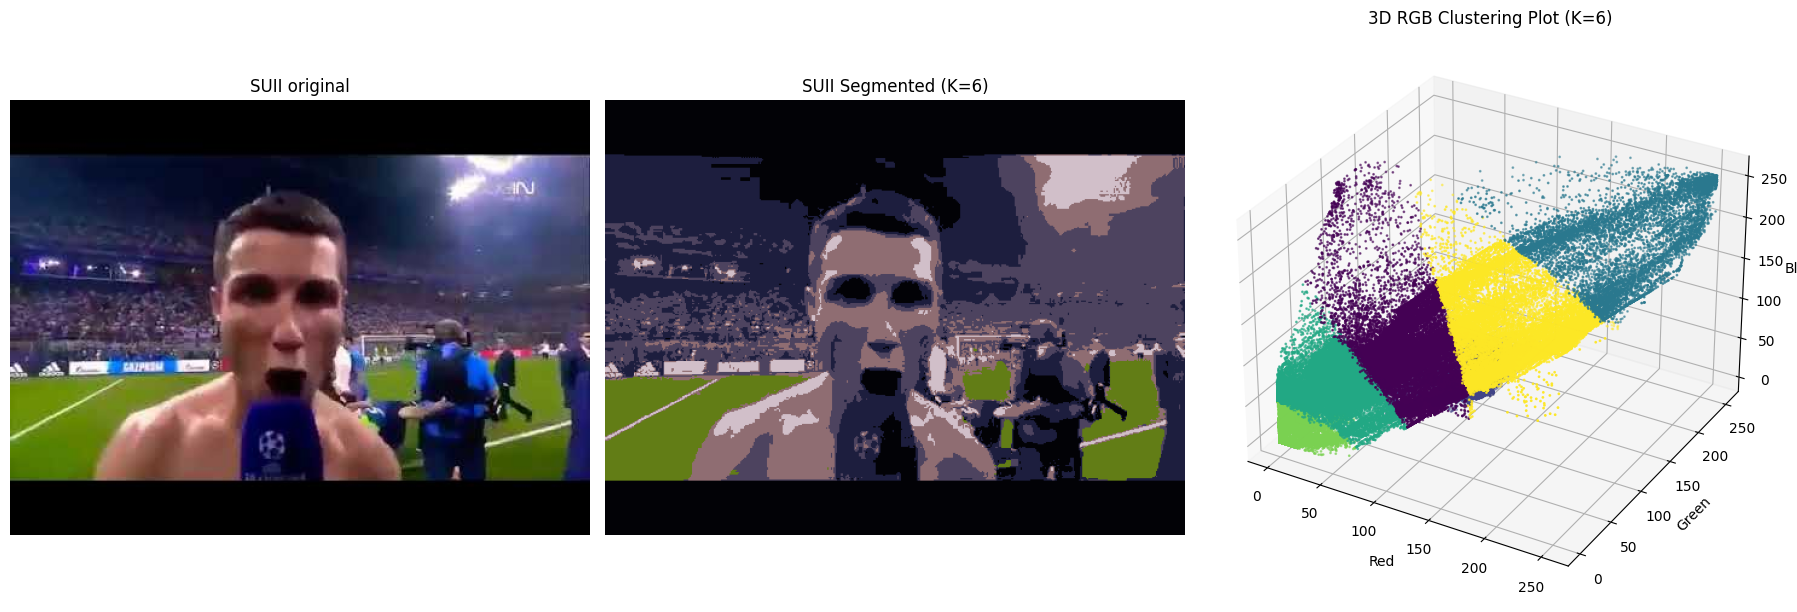

In [ ]:

# Set up the figure for multiple subplots
fig = plt.figure(figsize=(18, 6))

# Plot original image
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image)
ax1.set_title('SUII original')
ax1.axis('off')

# Plot segmented image
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(segmented_image)
ax2.set_title('SUII Segmented (K={})'.format(k))
ax2.axis('off')

# Plot the 3D scatter diagram for clustering in RGB space
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
r = pixels[:, 0]
g = pixels[:, 1]
b = pixels[:, 2]

# Use labels to color the pixels in the scatter plot
ax3.scatter(r, g, b, c=labels.flatten(), s=1, cmap='viridis')
ax3.set_xlabel('Red')
ax3.set_ylabel('Green')
ax3.set_zlabel('Blue')
ax3.set_title('3D RGB Clustering Plot (K={})'.format(k))

# Show the final plot
plt.tight_layout()
plt.show()
